熱浴法を用いた2次元イジング模型の配位を作成

In [1]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

関数を定義

In [2]:
# 周期境界条件を考慮してサイトの移動を管理
def xup(x):
    x += 1
    if x >= L[0]:
        x -= L[0]
    return x
def yup(y):
    y += 1
    if y >= L[1]:
        y -= L[1]
    return y
def xdn(x):
    x -= 1
    if x < 0:
        x += L[0]
    return x
def ydn(y):
    y -= 1
    if y < 0:
        y += L[1]
    return y

# ある点(x,y)の上下左右のスピンを合計する
def spin_sum(sc, x, y):
    h = 0
    h += sc[xup(x)][y]
    h += sc[xdn(x)][y]
    h += sc[x][yup(y)]
    h += sc[x][ydn(y)]
    return h

# ある点(x,y)の熱浴法を行う
def heatbath_local(beta, hz, sc, x, y):
    h = spin_sum(sc, x, y) - hz
    # このサイトが次に s=+1 となる確率を計算する
    p = math.exp(beta * h) / (math.exp(beta * h) + math.exp(-beta * h))
    r = random.random()
    # 確率に基づいてランダムに s を決定する
    if r < p:   # success
        sc[x][y] = 1
    else:
        sc[x][y] = -1
    return sc

# 全ての (x,y) に対して熱浴法を行う
def heatbath(beta, hz, sc):
    xlist = list(range(L[0]))
    random.shuffle(xlist)
    ylist = list(range(L[1]))
    random.shuffle(ylist)
    for x in xlist:
        for y in ylist:
           sc = heatbath_local(beta, hz, sc, x, y)
    return sc

# 磁化率を計算する
def magnetization(sc):
    m = 0
    for x in range(L[0]):
        for y in range(L[1]):
            m += sc[x][y]
    return m / (L[0] * L[1])


# モンテカルロ法の初期配位をセットする
def init_conf_cold():
    sc = [[1] * L[1] for i in range(L[0])]
    return sc 

def init_conf(init="cold"):
    sc = init_conf_cold()
    if init == "cold":
        return sc
    for x in range(L[0]):
        for y in range(L[1]):
            r = random.random()
            if r < 0.5:
                sc[x][y] = 1
            else:
                sc[x][y] = -1
    return sc   

  0%|          | 0/1000 [00:00<?, ?it/s]

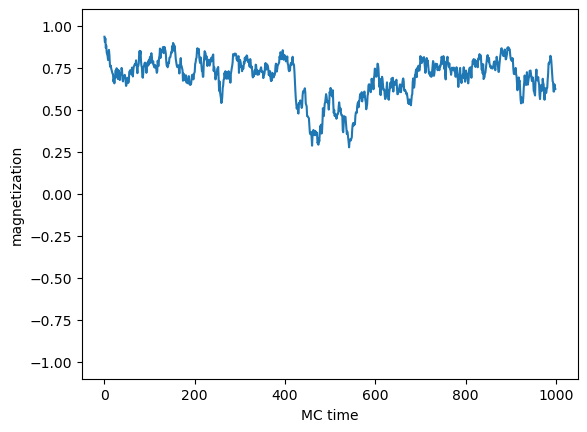

In [3]:
L = [32, 32]
beta = 0.440687
hz = 0.0
Nsweep = 10**3
#
sc = init_conf()
mctime = [] ; mag_hist = []
for isweep in tqdm(range(Nsweep)):
    sc = heatbath(beta, hz, sc)
    mag = magnetization(sc)
    mctime.append(isweep)
    mag_hist.append(mag)
plt.plot(mctime, mag_hist)
plt.ylim([-1.1, 1.1])
plt.xlabel("MC time")
plt.ylabel("magnetization")
plt.show()

データの準備

In [4]:
N_dis = 10**2   # 捨てる個数
N_trj = 10**3   # トータルのアップデート回数
N_sav = 10      # アップデート10回ごとに配位を保存
prm_list = [
    # beta, # of_trj, # of_discard, file_name, save_every
    [0.90, N_trj, N_dis, "conf/L32b090_", N_sav],
    [0.85, N_trj, N_dis, "conf/L32b085_", N_sav],
    [0.80, N_trj, N_dis, "conf/L32b080_", N_sav],
    [0.75, N_trj, N_dis, "conf/L32b075_", N_sav],
    [0.70, N_trj, N_dis, "conf/L32b070_", N_sav],
    [0.65, N_trj, N_dis, "conf/L32b065_", N_sav],
    [0.60, N_trj, N_dis, "conf/L32b060_", N_sav],
    [0.55, N_trj, N_dis, "conf/L32b055_", N_sav],
    [0.50, N_trj, N_dis, "conf/L32b050_", N_sav],
    [0.47, N_trj, N_dis, "conf/L32b047_", N_sav],
    [0.42, N_trj, N_dis, "conf/L32b042_", N_sav],
    [0.40, N_trj, N_dis, "conf/L32b040_", N_sav],
    [0.35, N_trj, N_dis, "conf/L32b035_", N_sav],
    [0.30, N_trj, N_dis, "conf/L32b030_", N_sav],
    [0.25, N_trj, N_dis, "conf/L32b025_", N_sav],
    [0.20, N_trj, N_dis, "conf/L32b020_", N_sav],
    [0.15, N_trj, N_dis, "conf/L32b015_", N_sav],
    [0.10, N_trj, N_dis, "conf/L32b010_", N_sav],
    [0.05, N_trj, N_dis, "conf/L32b005_", N_sav],
    [0.00, N_trj, N_dis, "conf/L32b000_", N_sav],
    ]

beta=0.9 1000


  0%|          | 0/1000 [00:00<?, ?it/s]


beta=0.85 1000


  0%|          | 0/1000 [00:00<?, ?it/s]


beta=0.8 1000


  0%|          | 0/1000 [00:00<?, ?it/s]


beta=0.75 1000


  0%|          | 0/1000 [00:00<?, ?it/s]


beta=0.7 1000


  0%|          | 0/1000 [00:00<?, ?it/s]


beta=0.65 1000


  0%|          | 0/1000 [00:00<?, ?it/s]


beta=0.6 1000


  0%|          | 0/1000 [00:00<?, ?it/s]


beta=0.55 1000


  0%|          | 0/1000 [00:00<?, ?it/s]


beta=0.5 1000


  0%|          | 0/1000 [00:00<?, ?it/s]


beta=0.47 1000


  0%|          | 0/1000 [00:00<?, ?it/s]


beta=0.42 1000


  0%|          | 0/1000 [00:00<?, ?it/s]


beta=0.4 1000


  0%|          | 0/1000 [00:00<?, ?it/s]


beta=0.35 1000


  0%|          | 0/1000 [00:00<?, ?it/s]


beta=0.3 1000


  0%|          | 0/1000 [00:00<?, ?it/s]


beta=0.25 1000


  0%|          | 0/1000 [00:00<?, ?it/s]


beta=0.2 1000


  0%|          | 0/1000 [00:00<?, ?it/s]


beta=0.15 1000


  0%|          | 0/1000 [00:00<?, ?it/s]


beta=0.1 1000


  0%|          | 0/1000 [00:00<?, ?it/s]


beta=0.05 1000


  0%|          | 0/1000 [00:00<?, ?it/s]


beta=0.0 1000


  0%|          | 0/1000 [00:00<?, ?it/s]

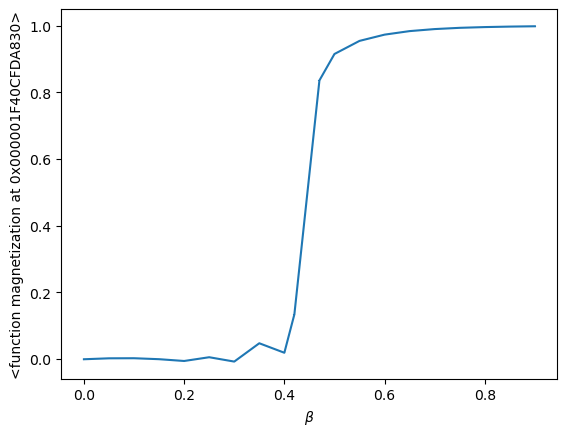

In [5]:
# conf ディレクトリがなければ作る
import os

os.makedirs("conf_triangular", exist_ok = True)    # exist_ok=Trueはconfフォルダが既にあったときにエラーを出力しなくする

L = [32, 32]    # 格子サイズの設定
hz = -0.0005    # 相転移を見るために非常に弱い磁場を添加

nprm = len(prm_list)    # パラメータリストの長さを調べる
betas = []
mags = []
mags_er = []
#
random.seed(777)
sc = init_conf()
# 各ベータごとにパラメータを読みだして配位を作る
for ibeta in range(nprm):
    beta = prm_list[ibeta][0]
    Nsweep = prm_list[ibeta][1]
    Ndiscard = prm_list[ibeta][2]
    fname = prm_list[ibeta][3]
    save_every = prm_list[ibeta][4]
    conf_cnt = 0
    #
    print(f"beta={beta} {Nsweep}")
    mag_hist = []
    # 熱浴法で配位を作る
    for isweep in tqdm(range(Nsweep)):
        sc = heatbath(beta, hz, sc)
        mag = magnetization(sc)
        mag_hist.append(mag)
        if (isweep % save_every == 0)&(isweep >= Ndiscard):
            scn = np.array(sc)
            np.save(f"{fname}{conf_cnt}", scn)
            conf_cnt += 1
    #
    print("")
    mag_hist = np.array(mag_hist[Ndiscard:])
    mag = np.mean(mag_hist)
    mag_er = np.std(mag_hist) / np.sqrt(len(mag_hist) - 1)
    #
    betas.append(beta)
    mags.append(mag)
    mags_er.append(mag_er)
#
plt.xlabel(r"$\beta$")
plt.ylabel(magnetization)
plt.errorbar(betas, mags, yerr = mag_er)
plt.show()

        
        
        
    